In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [4]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print('Testing data shape: ', test.shape)
test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


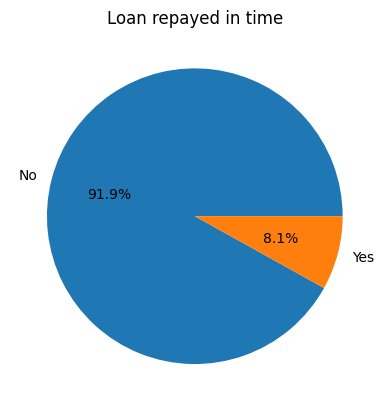

In [7]:
plt.pie(train['TARGET'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Loan repayed in time')
plt.show()

In [15]:
print('Cols with percentage of missing data:')
train.isna().mean().sort_values(ascending=False).head(25) * 100

Cols with percentage of missing data:


COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
dtype: float64

In [16]:
print('Types of cols:')
train.dtypes.value_counts()

Types of cols:


float64    65
int64      41
object     16
dtype: int64

In [18]:
print('Number of unique values for categorical features:')
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values()

Number of unique values for categorical features:


NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

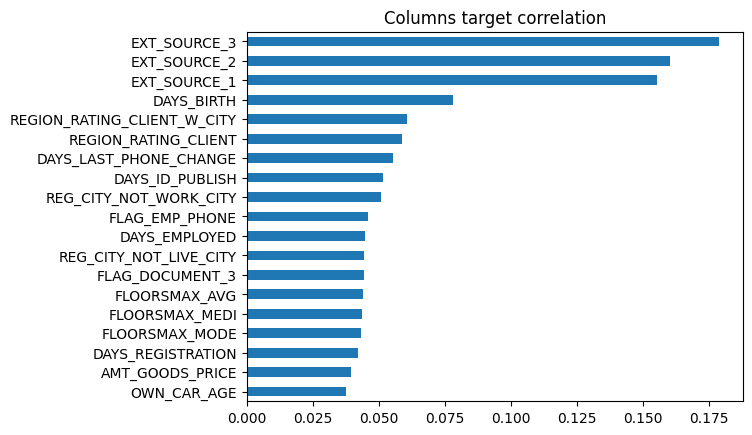

In [28]:
correlations = train.corr(numeric_only=True)['TARGET'].abs().sort_values()
correlations[-20:-1].plot(kind='barh')
plt.title('Columns target correlation')
plt.show()

Age 


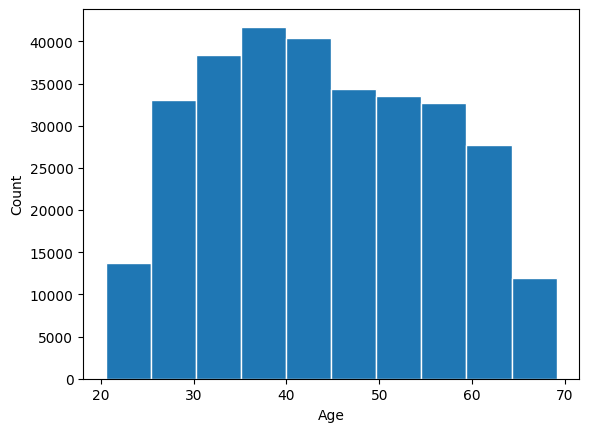

In [29]:
print('Age ')
(train['DAYS_BIRTH'] / -365).plot.hist(edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

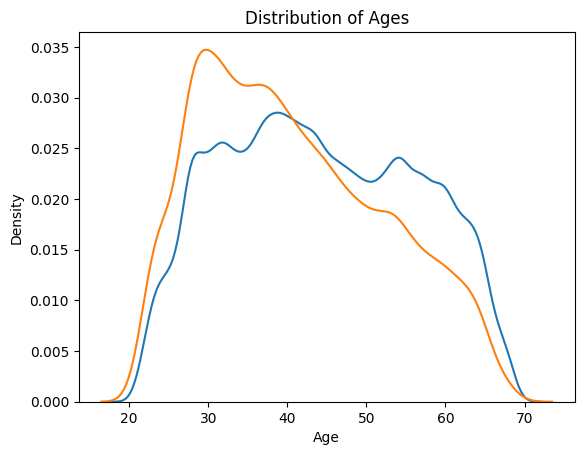

In [34]:
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'Not repayed loan in time')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'Repayed loan in time')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.show()

In [46]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def cross_validate(features, target, clf, n_splits):
  k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=0)

  score_total = 0
  for train_slice, validation_slice in k_fold.split(features):
    model = clf.fit(features[train_slice], target[train_slice])
    validation_predictions = model.predict_proba(features[validation_slice])[:, 1]
    
    score_total += roc_auc_score(target[validation_slice], validation_predictions)

  return score_total / n_splits

In [50]:
from sklearn.impute import SimpleImputer as Imputer
from sklearn.ensemble import RandomForestClassifier


train_ids = train['SK_ID_CURR']
test_ids = test['SK_ID_CURR']

targets = train['TARGET']

features = train.drop(columns = ['SK_ID_CURR', 'TARGET'])
test_features = test.drop(columns = ['SK_ID_CURR'])


features = pd.get_dummies(features)
test_features = pd.get_dummies(test_features)
features, test_features = features.align(test_features, join = 'inner', axis = 1)

imputer = Imputer(strategy = 'median')

imputer.fit(features)

features = imputer.transform(features)
test_features = imputer.transform(test_features)

scores = []
classifiers = []


for i, n_estimators in enumerate([10, 50, 100]):    
  classifiers.append(RandomForestClassifier(
    n_estimators=n_estimators,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced',
  ))

  scores.append(cross_validate(features, targets, classifiers[i], 5))

scores

[0.6990016608906598, 0.7129488158556733, 0.7163257007152362]

In [58]:
submit = pd.DataFrame({ 'SK_ID_CURR': test_ids, 'TARGET': classifiers[np.argmax(scores)].predict_proba(test_features)[:, 1] })
submit.to_csv('submission.csv', index=False)

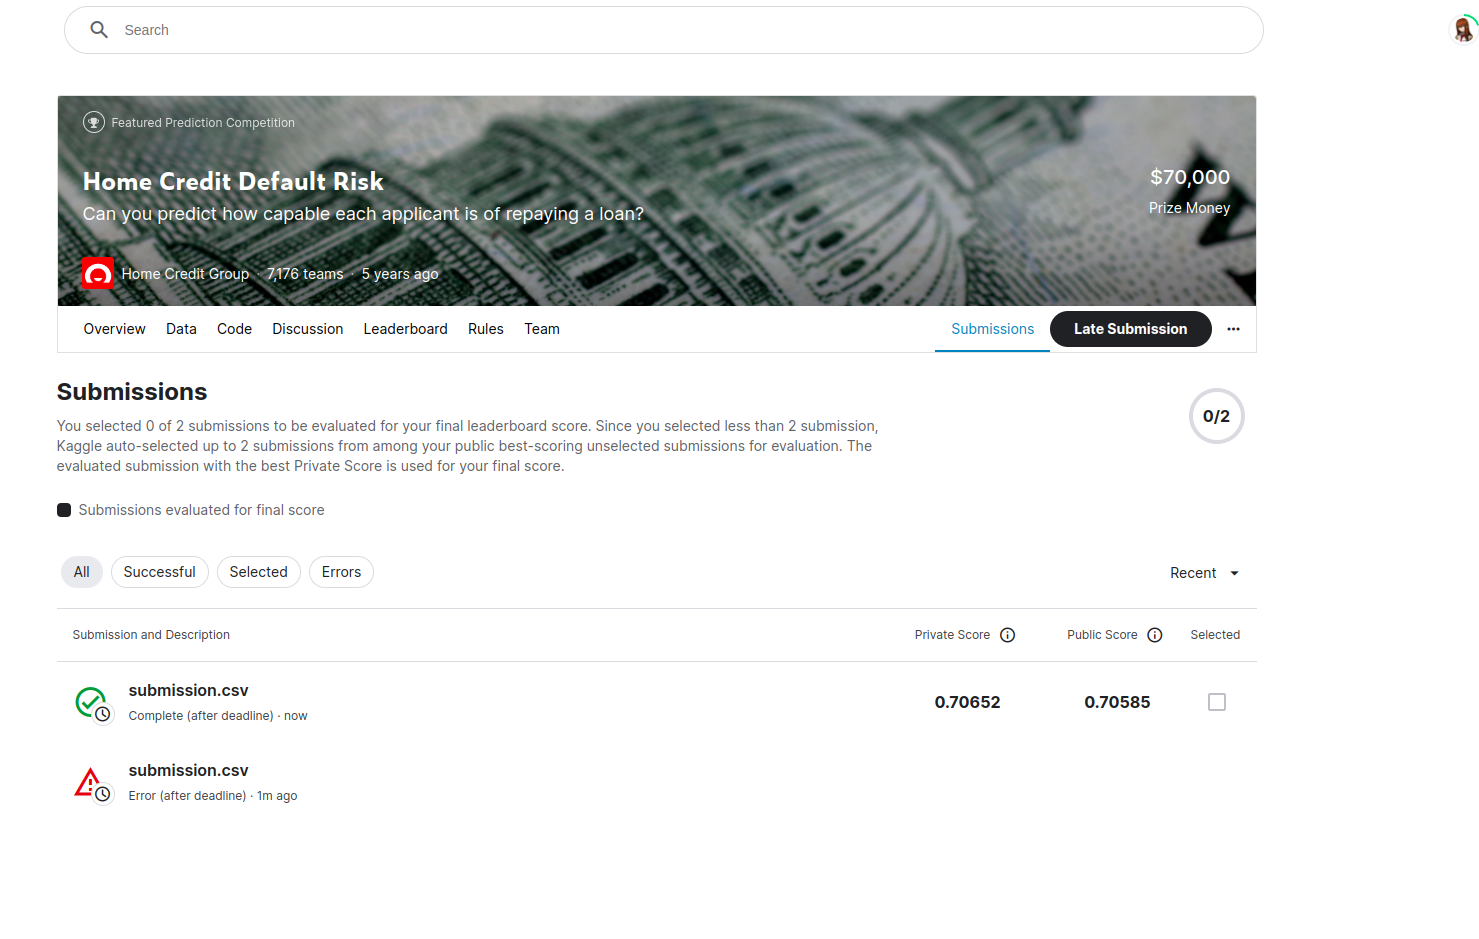